# Linear Regression with Python Scikit Learn (Supervised Learning)


### By Sagar Matur

**Task 1:** The problem involves two variables, apply simple linear regression model and predict the percentage of a student based on the number of study hours  

In [1]:
# Importing all the required libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

* pandas: This library is a mainstay across storing, processing and describing the dataset.
* numpy: numpy stands for Numerical python. This library used for working with large arrays and matrices.
* matplotlib: This is the visualization tool in the python.

In [2]:
# importing the data
df = pd.read_csv("student_scores.csv")  
df.head()    #This prints the first five observations of the dataframe.
#df.tail() : prints the last five observations of the dataframe.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:>

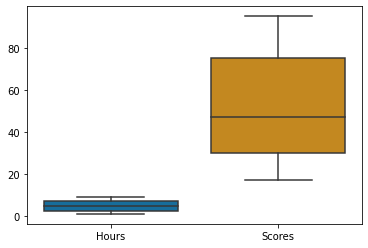

In [3]:
#Box plot to check the outliers in the dataset
import seaborn as sns
sns.boxplot(data=df, palette="colorblind")

Above graph depicts that there are no outliers in the variables.

## Data Preparation

Divide the dataset into "independent variables" (inputs) and "Dependent variable" (outputs). In our study we have one independent variable: "Hours" and one dependent variable: "Scores".

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

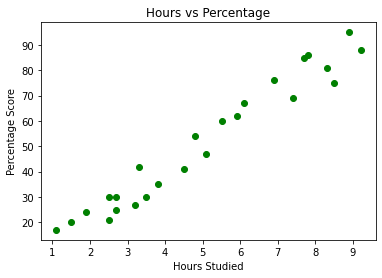

In [5]:
# Plotting the distribution of scores
plt.scatter(X, y, color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above graph depicts that there is a linear relationship between "Percentage Score" and "Hours Studied. That is, as the number of study hours increases the scores also increases.

Divide the dataset into two parts: Train set and Test set. 75% of the data is assigned to train set and 25% data is assigned to the test set.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

## Train the Model

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

1.932204253151646
[9.94167834]


* intercent=1.93, implies that if the student does not study at all then he is likely to score 2% (approximately).
* Coefficient=9.94, implies that if the student studies extra one hour per day then he is likely to score extra 10% (approximately).


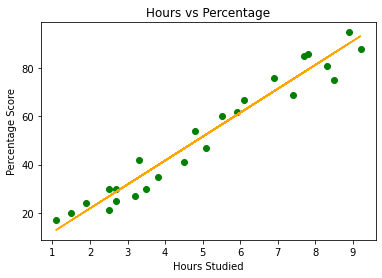

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='green')
plt.plot(X, line, color='orange');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Test the model
We have trained our model, now it's time to test the model.

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### **Model Evaluation**

In [11]:
from sklearn import metrics  
MAE = metrics.mean_absolute_error(y_test, y_pred) 
print('Mean Absolute Error:', MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE_scores = np.sqrt(MSE) # convert from MSE to RMSE
print('Root Mean Squared Error:', RMSE_scores)

Mean Absolute Error: 4.130879918502486
Root Mean Squared Error: 4.5092043283688055


In [12]:
# Prediction of scores if a student studies for 9.25 hrs/day.
hours = 9.25
print(regressor.predict([[hours]]))

[93.89272889]


This implies that if the student studies for 9.25 hours/day, then he is likely to score 94% (approximately).